In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime
import scipy.stats as st
import statsmodels.api as sm

In [2]:

csv = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv', error_bad_lines=False)

date = csv['data']
pos = csv['totale_positivi']
dec = csv['deceduti']
gua = csv['dimessi_guariti']

temp = pd.read_csv('Milano-2020-Febbraio-Aprile-Temp.csv', sep=';')
temp = temp.loc[22:]
temp.head()

,LOCALITA,DATA,TMEDIA °C,TMIN °C,TMAX °C,PUNTORUGIADA °C,UMIDITA %,VISIBILITA km,VENTOMEDIA km/h,VENTOMAX km/h,RAFFICA km/h,PRESSIONESLM mb,PRESSIONEMEDIA mb,PIOGGIA mm,FENOMENI
22,Milano,23/02/2020,10,4,15,6,73,19,10,21,0,1025,0,0,NaN
23,Milano,24/02/2020,13,9,19,8,70,15,13,21,0,1018,0,0,NaN
24,Milano,25/02/2020,11,9,14,8,79,8,3,8,0,1010,0,0,NaN
25,Milano,26/02/2020,10,7,14,7,57,10,17,31,0,1001,0,0,nebbia
26,Milano,27/02/2020,8,1,12,0,38,20,8,15,0,1008,0,0,NaN


In [3]:
dates=csv['data']
x_values = [d[:d.find('T')] for d in dates ]
x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in x_values]

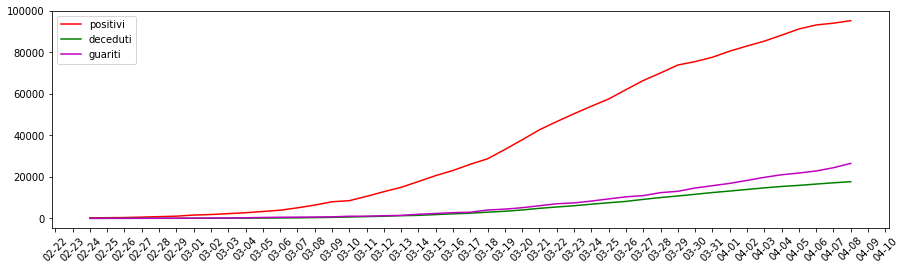

In [4]:
#Plot dei dati con colori fuorvianti
plt.figure(figsize=(15,4))
ax=plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator =mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values,pos, 'r')
plt.xticks(rotation=45)
plt.plot(x_values, dec, 'g')
plt.plot(x_values, gua, 'm')
plt.legend(['positivi', 'deceduti', 'guariti'])
plt.show()

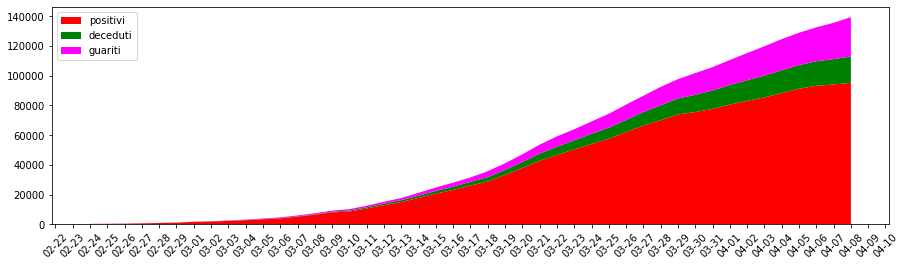

In [5]:
#Misleading colurs stacked version
plt.figure(figsize=(15,4))
ax=plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator =mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.stackplot(x_values, pos, dec, gua, colors=['red', 'green', 'magenta'])
plt.xticks(rotation=45)
plt.legend(['positivi', 'deceduti', 'guariti'], loc='upper left')
plt.show()

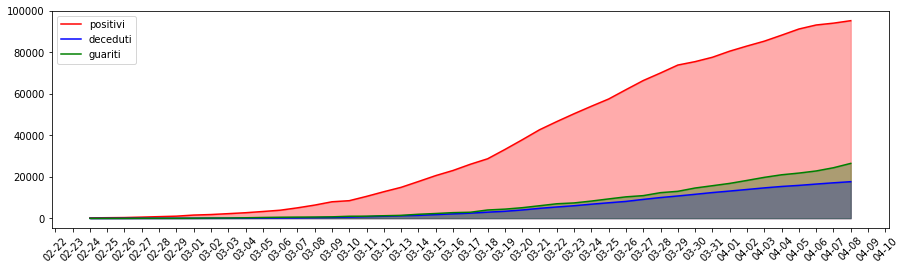

In [6]:
#Misleading plot with transparent area
plt.figure(figsize=(15,4))
ax=plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator =mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, pos, color='r')
plt.plot(x_values, dec, color='b')
plt.plot(x_values, gua, color='g')
ax.fill_between(x_values, 0, pos, color='r', alpha=0.33)
ax.fill_between(x_values, 0, dec, color='b', alpha=0.33)
ax.fill_between(x_values, 0, gua, color='g', alpha=0.33)
plt.xticks(rotation=45)
plt.legend(['positivi', 'deceduti', 'guariti'], loc='upper left')
plt.show()

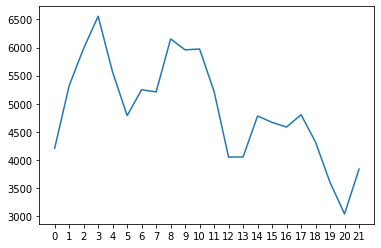

In [7]:
#Plot dei dati con asse y manipolato
#Variazione dei casi positivi
data = csv['nuovi_positivi'][23:]
plt.plot(range(0, len(data)), data)
plt.xticks(range(0, len(data)))
#plt.ylim(bottom=0)
plt.show()

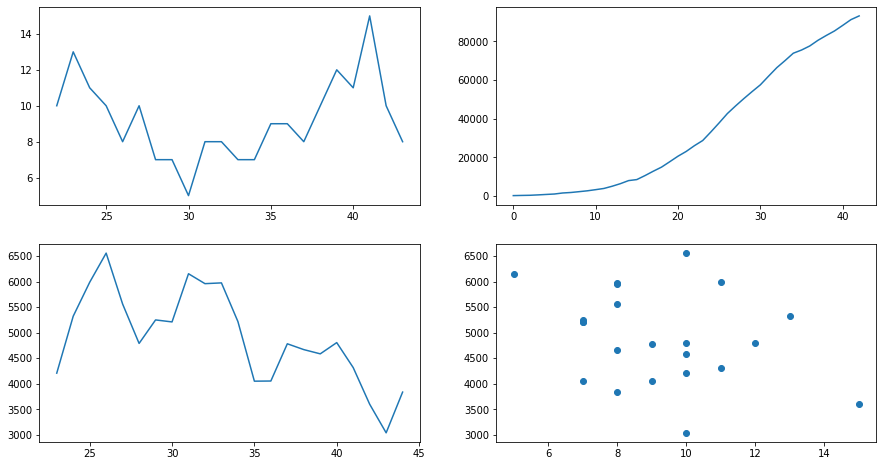

In [8]:
plt.figure(figsize=(15,8))
plt.subplot(221)
tm = temp['TMEDIA °C']
plt.plot(tm[:len(data.index)])
plt.subplot(222)
plt.plot(pos[:len(temp.index)])
plt.subplot(223)
plt.plot(data)
plt.subplot(224)

plt.scatter(tm[:len(data.index)], data)
plt.show()

In [24]:
#Correlazione
nuovi_data = csv['nuovi_positivi']
wifi_csv = pd.read_csv('http://dati.comune.milano.it/dataset/4682cb43-fcb4-488e-b4db-a8b88f3ef1fe/resource/07caba9c-770e-4466-90dc-e09a686a3b7d/download/20200408-230033_registered.csv', sep=';', parse_dates=True)
wifi_csv=wifi_csv[wifi_csv['Data']>='2020-02-24 00:00:00+02:00']
wifi_data=wifi_csv.groupby(['Data']).sum()

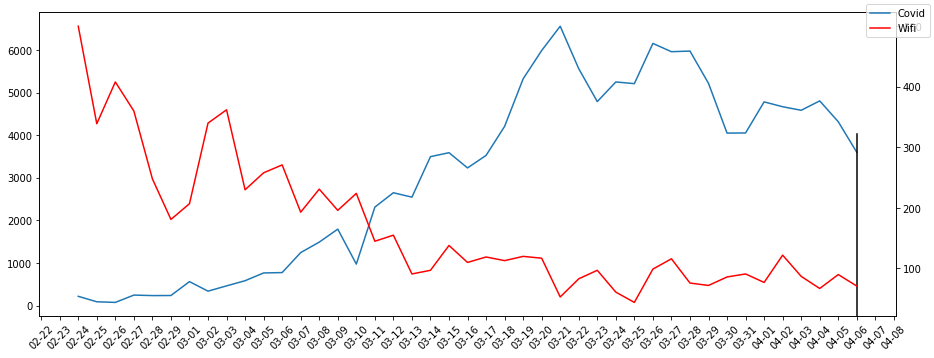

In [112]:
extract = min(len(x_values), len(wifi_data))

fig, ax1 = plt.subplots(figsize=(13,5))
ax2 = ax1.twinx()

formatter = mdates.DateFormatter("%m-%d")

locator =mdates.DayLocator()
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_major_locator(locator)

ax1.plot(x_values[:extract], nuovi_data[:extract])
ax2.plot(x_values[:extract], wifi_data['Valore'].iloc[:extract], 'r-')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45 )
fig.legend(["Covid", "Wifi"])
ax1.axvline(x=x_values[-3], ymax=0.6, color='black')
fig.tight_layout()
plt.show()

In [56]:
st.pearsonr(nuovi_data[:extract],wifi_data['Valore'].iloc[:extract])

(-0.8363413964954405, 2.9044700296177177e-12)

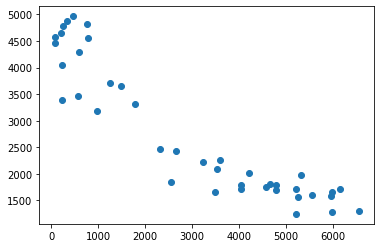

In [12]:
plt.scatter(nuovi_data, wifi_data['Valore'])